## Building Innovative Systems - Prediction in time series dataset
##### Swetangi Rastogi <br> 101903249 <br> srastogi_be19@thapar.edu

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import math
from sklearn.ensemble import RandomForestRegressor

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Importing the dataset 

In [3]:
df = pd.read_csv("D:\\College\\Semester 7\\Building Innovative Systems\\projects\\PROJECT 1\\DATASET.xlsx - dataset road (1).csv")
df.head()

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.52
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.62
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.68
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.78
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.80


In [4]:
#checking the  type of columns in dataset
df.dtypes

Unnamed: 0     object
year            int64
Para-1        float64
Para-2        float64
Para-3        float64
Para-4        float64
Para-5          int64
Para-6          int64
Para-7          int64
Para-8          int64
Para-9        float64
Para-10       float64
Para-11       float64
Para-12         int64
Para-13       float64
dtype: object

In [5]:
#View of the dataset
df

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,NaN,6,454.0,931.8,13.6,125.0,13,116,4150,830,15.1,1.8,1.0,15,1.681
1005,NaN,7,454.0,703.0,14.5,17.0,13,118,4150,830,24.6,7.9,2.0,15,1.838
1006,NaN,8,454.0,1124.1,14.9,45.0,18,117,4200,840,119.0,15.7,2.0,16,1.862
1007,NaN,9,454.0,1462.3,13.2,62.0,27,117,4400,720,138.2,30.5,6.0,18,1.883


### Cleaning and Preprocessing of the Dataset

In [6]:
#Removing the section with no 10th row from the dataset 

df2 = pd.DataFrame() #making an empty dataframe
sec_no = ""
i = 0
new_df = pd.DataFrame()
while i < len(df):
    j = 0
    if type(df.iloc[i][0])==str:
        sec_no = df.iloc[i][0]
        j+=1
    j+=i
    exist = False
    while j < len(df) and type(df.iloc[j][0])!=str:
        if df.iloc[j][1] == 10:
            exist = True
        j += 1
    
    if(exist):
        df2 = df2.append(df.loc[i:j-1,:])
        new_df = new_df.append(df.loc[i:j-1,:])
        new_df = new_df.iloc[0:0]
    i = j

df2.reset_index(inplace=True,drop=True)
final_df=df2

In [7]:
#Cleaned Dataframe
final_df

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,6,454.0,931.8,13.6,125.0,13,116,4150,830,15.1,1.8,1.0,15,1.681
996,NaN,7,454.0,703.0,14.5,17.0,13,118,4150,830,24.6,7.9,2.0,15,1.838
997,NaN,8,454.0,1124.1,14.9,45.0,18,117,4200,840,119.0,15.7,2.0,16,1.862
998,NaN,9,454.0,1462.3,13.2,62.0,27,117,4400,720,138.2,30.5,6.0,18,1.883


In [8]:
# Grouping the entries according to their sections
j = 0
for i in range(int(len(df2)/10)):
    final_df.iloc[j:j + 10, 0] = df2.iloc[j, 0]
    j += 10
final_df

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Sec_101,6,454.0,931.8,13.6,125.0,13,116,4150,830,15.1,1.8,1.0,15,1.681
996,Sec_101,7,454.0,703.0,14.5,17.0,13,118,4150,830,24.6,7.9,2.0,15,1.838
997,Sec_101,8,454.0,1124.1,14.9,45.0,18,117,4200,840,119.0,15.7,2.0,16,1.862
998,Sec_101,9,454.0,1462.3,13.2,62.0,27,117,4400,720,138.2,30.5,6.0,18,1.883


In [9]:
#Change column name
final_df.columns = final_df.columns.str.replace('Unnamed: 0', 'Group')

In [10]:
final_df

,Group,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Sec_101,6,454.0,931.8,13.6,125.0,13,116,4150,830,15.1,1.8,1.0,15,1.681
996,Sec_101,7,454.0,703.0,14.5,17.0,13,118,4150,830,24.6,7.9,2.0,15,1.838
997,Sec_101,8,454.0,1124.1,14.9,45.0,18,117,4200,840,119.0,15.7,2.0,16,1.862
998,Sec_101,9,454.0,1462.3,13.2,62.0,27,117,4400,720,138.2,30.5,6.0,18,1.883


In [11]:
#finding null entries
df2.isnull().sum()

Group      0
year       0
Para-1     0
Para-2     0
Para-3     0
Para-4     0
Para-5     0
Para-6     0
Para-7     0
Para-8     0
Para-9     0
Para-10    0
Para-11    0
Para-12    0
Para-13    2
dtype: int64

In [12]:
#Replacing null cells with zero
df2.fillna(0, inplace=True)
df2.isnull().sum()

Group      0
year       0
Para-1     0
Para-2     0
Para-3     0
Para-4     0
Para-5     0
Para-6     0
Para-7     0
Para-8     0
Para-9     0
Para-10    0
Para-11    0
Para-12    0
Para-13    0
dtype: int64

### Test Dataset Creation

In [13]:
#Test Dataset
test_df = final_df.loc[final_df['year'] == 10]
test_df= test_df.reset_index()
test_df

,index,Group,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.960
1,19,Sec_2,10,327.7,62.0,22.7,0.0,2,102,30525,10234,76.5,44.3,5.0,9,0.795
2,29,Sec_3,10,487.7,93.2,22.5,0.0,4,110,2140,1270,78.5,0.0,0.0,16,1.432
3,39,Sec_4,10,543.6,93.2,22.5,0.0,4,110,2140,1270,28.5,60.5,67.0,11,2.004
4,49,Sec_5,10,434.4,149.0,11.7,72.0,3,110,13142,6225,0.0,276.2,34.0,6,1.792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,959,Sec_97,10,514.0,1226.4,10.1,203.6,16,114,7672,303,219.7,206.2,10.0,8,1.607
96,969,Sec_98,10,901.0,1531.0,11.1,34.9,40,100,15150,1077,5.9,74.5,33.0,13,1.087
97,979,Sec_99,10,1181.0,1364.9,9.2,274.3,24,112,12500,880,131.4,72.4,18.0,12,0.996
98,989,Sec_100,10,662.0,1110.7,12.8,33.2,27,117,3324,1356,193.7,305.6,180.0,12,2.212


## Models

In [14]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(objective="regression",metric="rmse",boosting_type='dart')

In [15]:
import xgboost as xgb
xgb_ = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [16]:
etr = ExtraTreesRegressor(n_estimators=200,bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=1000,
                    min_impurity_decrease=0.0, 
                    min_samples_leaf=1,
                    min_weight_fraction_leaf=0.1,
                    n_jobs=None, oob_score=False, random_state=123, verbose=0,
                    warm_start=False)


In [17]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

### Model Analysis and Training

In [55]:
predict_col_names = ['Para-9', 'Para-10', 'Para-11', 'Para-12', 'Para-13']

In [56]:
result = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}

In [57]:
from sklearn.model_selection import train_test_split
def ChooseModel(val):
    RMSE = []
    N = 0
    index = 0

    #For Applying LGBMRegressor
    if(val==0):
        for j in [10, 11, 12, 13, 14]:
            ans = 0
            count = 0
            for i in range(0, 1000, 10):

                #Extracting Train and Test Data
                xtrain = df2.iloc[i:i+9, 1:10].values
                ytrain = df2.iloc[i:i+9, j]
                xtest = df2.iloc[i+9, 1:10].to_numpy()
                ytest = df2.iloc[i+9, j]

                #For Applying LGBMRegressor
                lgbm.fit(xtrain, ytrain)

                #Predicting Values
                ypred = lgbm.predict(xtest.reshape(1, -1))[0]
                
                #Appending Results
                result[predict_col_names[index]].append(ypred)
                ans += (ytest - ypred)**2
                count += 1
                N += 1

            RMSE.append(ans)
            index += 1
        
    #For Applying XGBoost
    elif(val==1):
        for j in [10, 11, 12, 13, 14]:
            ans = 0
            count = 0
            for i in range(0, 1000, 10):

                #Extracting Train and Test Data
                xtrain = df2.iloc[i:i+9, 1:10].values
                ytrain = df2.iloc[i:i+9, j]
                xtest = df2.iloc[i+9, 1:10].to_numpy()
                ytest = df2.iloc[i+9, j]

                #For Applying XGBoost
                xgb_.fit(xtrain, ytrain)

                #Predicting Values
                ypred = xgb_.predict(xtest.reshape(1,-1))[0]

                #Appending Results
                result[predict_col_names[index]].append(ypred)
                ans += (ytest - ypred)**2
                count += 1
                N += 1

            RMSE.append(ans)
            index += 1


    #For Applying Extra Tree Regressor
    elif(val==2):
        for j in [10, 11, 12, 13, 14]:
            ans = 0
            count = 0
            for i in range(0, 1000, 10):
                #Extracting Train and Test Data
                xtrain = df2.iloc[i:i+9, 1:10]
                ytrain = df2.iloc[i:i+9, j]
                xtest = df2.iloc[i+9, 1:10].to_numpy()
                ytest = df2.iloc[i+9, j]

                #Applying Extra Tree Regressor 
                etr.fit(xtrain, ytrain)

                #Predicting Values
                ypred = etr.predict(xtest.reshape(1,-1))[0]

                #Appending Results
                result[predict_col_names[index]].append(ypred)
                ans += (ytest - ypred)**2
                count += 1
                N += 1

            RMSE.append(ans)
            index += 1
        
        
            
    #For Applying Random Forest    
    else:
        for j in [10, 11, 12, 13, 14]:
            ans = 0
            count = 0
            for i in range(0, 1000, 10):
                #Extracting Train and Test Data
                xtrain = df2.iloc[i:i+9, 1:10]
                ytrain = df2.iloc[i:i+9, j]
                xtest = df2.iloc[i+9, 1:10].to_numpy()
                ytest = df2.iloc[i+9, j]

                #Applying Random Forest 
                rf.fit(xtrain, ytrain)

                #Predicting Values
                ypred = rf.predict(xtest.reshape(1,-1))[0]

                #Appending Results
                result[predict_col_names[index]].append(ypred)
                ans += (ytest - ypred)**2
                count += 1
                N += 1

            RMSE.append(ans)
            index += 1
            
    return (RMSE, count)

In [58]:
#Applying different classifiers
# 0 - LGBM 
# 1 - XG Boost
# 2 - Extra Tree Regressor
# Other - Random Forest 
result_RMSE, result_count = ChooseModel(2)

In [59]:
#Predictions for each instance
predicted_df = pd.DataFrame.from_dict(result)
predicted_df

,Para-9,Para-10,Para-11,Para-12,Para-13
0,3.1625,57.4390,49.305,7.970,1.910250
1,58.9195,28.6880,0.910,7.915,0.792135
2,70.3385,0.0000,0.000,13.340,1.372835
3,20.4650,55.0285,57.850,7.445,1.861645
4,0.0000,258.6755,34.000,5.990,1.759120
...,...,...,...,...,...
95,183.6360,189.4390,9.875,7.910,1.550945
96,4.9760,69.9840,23.500,11.960,1.075742
97,114.5970,64.7870,14.055,11.565,0.963970
98,125.9505,266.9580,148.975,10.185,2.093925


In [60]:
#RMSE for each column
row=0
for i in result_RMSE:
    cur= row+9
    print("RMSE for Para-"+ str(cur) +": "+ str((i/result_count)**0.5))
    row= row+1


RMSE for Para-9: 63.54553816423265
RMSE for Para-10: 62.717093715170655
RMSE for Para-11: 25.61413897664725
RMSE for Para-12: 14.50378772941744
RMSE for Para-13: 0.25380261474660265


## Final RMSE

In [61]:
print("The best RMSE value obtained: "+str((sum(result_RMSE)/500)**0.5))

The best RMSE value obtained: 42.04278214971435


### Visualization of the Result obtained

In [62]:
#generation 50 random values for index
import random
ind = []
for i in range(50):
    ind.append(random.randint(0,100))

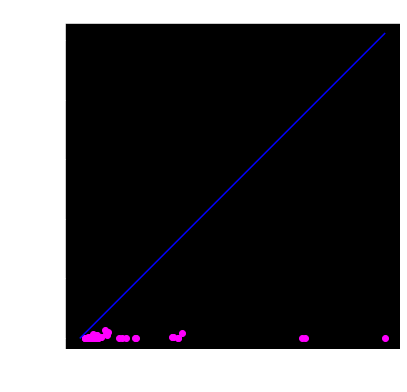

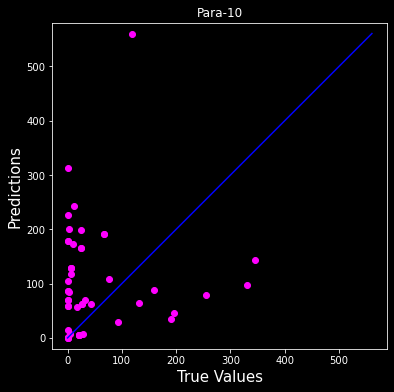

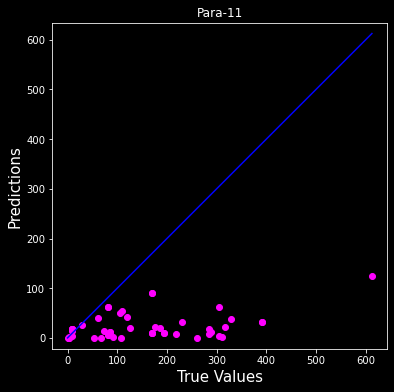

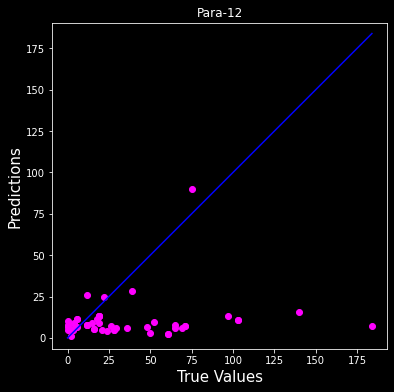

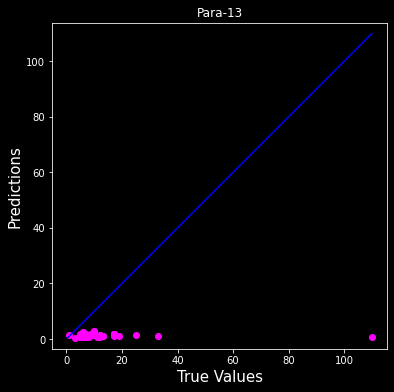

In [63]:
#plotting graph
for i in range(5):
    plt.figure(figsize=(6,6))
    plt.style.use('dark_background')
    true_value = test_df.iloc[ind, i+10]
    predicted_value = predicted_df.iloc[ind, i]
    plt.scatter(true_value, predicted_value, c='magenta')

    p1 = max(max(predicted_value), max(true_value))
    p2 = min(min(predicted_value), min(true_value))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.title(predict_col_names[i])
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()

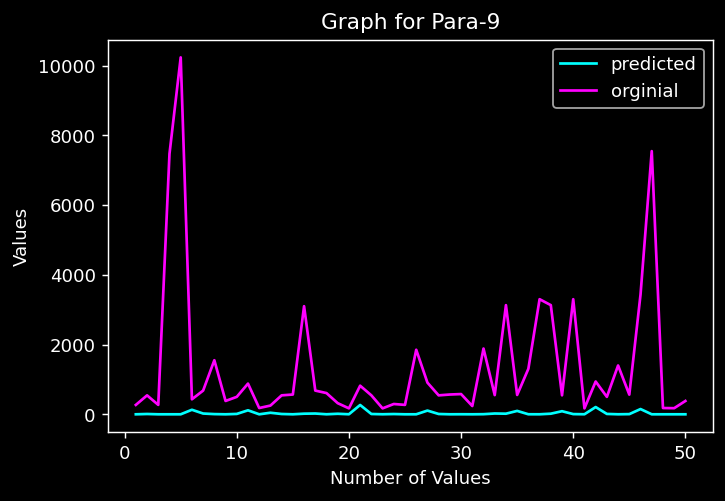

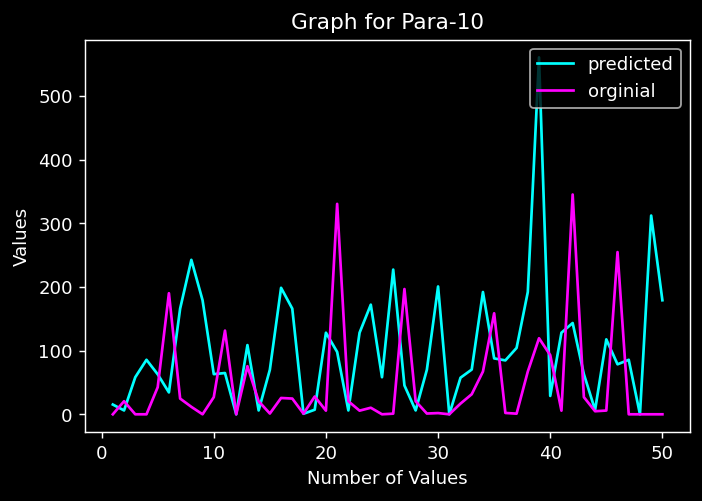

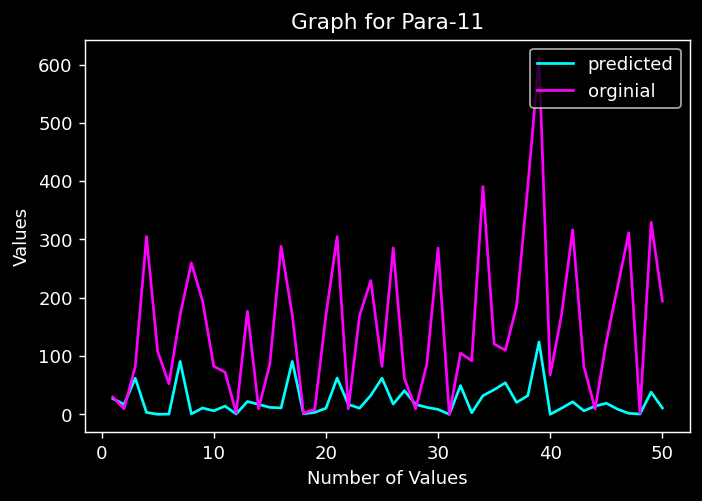

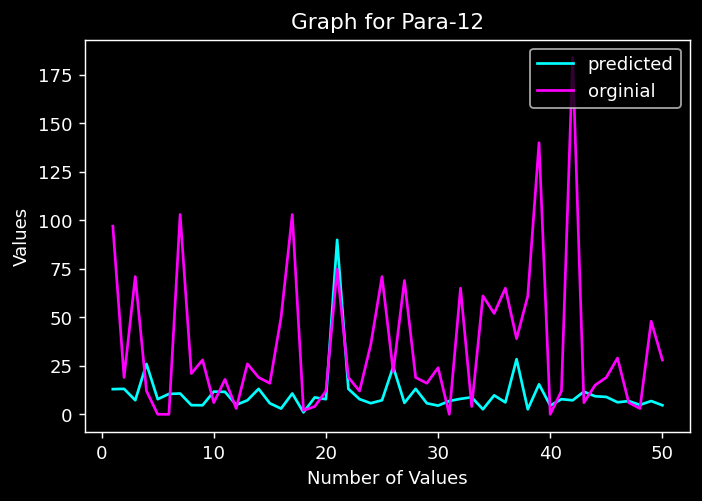

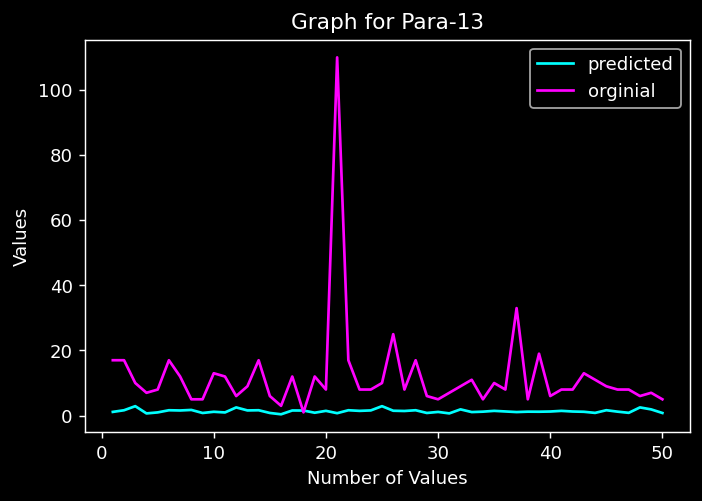

In [65]:
for i in range(5):
    plt.figure(figsize=(6, 4), dpi=130)
    plt.style.use('dark_background')
    x_value = []
    for j in range(len(true_value)):
        x_value.append(j+1)
    true_value = test_df.iloc[ind, i+10]
    predicted_value = predicted_df.iloc[ind, i]
    plt.plot(x_value,predicted_value, linestyle = 'solid', label = 'predicted', color='cyan')
    plt.plot(x_value,true_value, linestyle = 'solid', label = 'orginial', color='magenta')
    plt.xlabel('Number of Values')
    plt.ylabel('Values')
    plt.title('Graph for Para-'+str(i+9))
    plt.legend(loc = 'upper right')